*Test Task for Junior Python Developer position at Ajax Systems*

In [1]:
import pandas as pd

In [2]:
years_start = 25
years_end = 85

In [3]:
df = pd.read_csv('data/heart.csv')

In [4]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh
0,63,1,3,145,233,1,0,150
1,37,1,2,130,250,0,1,187
2,41,0,1,130,204,0,0,172
3,56,1,1,120,236,0,1,178
4,57,0,0,120,354,0,1,163
...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123
299,45,1,3,110,264,0,1,132
300,68,1,0,144,193,1,1,141
301,57,1,0,130,131,0,1,115


In [5]:
df.shape

(303, 8)

In [6]:
df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
dtype: object

Filtering data by trtbps

In [7]:
df = df[df.trtbps >= 140]

In [8]:
df.shape

(97, 8)

In [9]:
bins = [i for i in range(years_start, years_end + 1, 10)]

In [10]:
labels = ['25-34', '35-44', '45-54', '55-64', '65-74', '75-84']



Labeling age groups for aggregating

In [11]:
df['age_group'] = pd.cut(x=df['age'], bins=bins, labels=labels, right=False)

<ipython-input-11-b061084053a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(x=df['age'], bins=bins, labels=labels, right=False)


In [12]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,age_group
0,63,1,3,145,233,1,0,150,55-64
5,57,1,0,140,192,0,1,148,55-64
6,56,0,1,140,294,0,0,153,55-64
8,52,1,2,172,199,1,1,162,45-54
9,57,1,2,150,168,0,1,174,55-64


In [13]:
plot_data = df.groupby('age_group').mean()['thalachh']

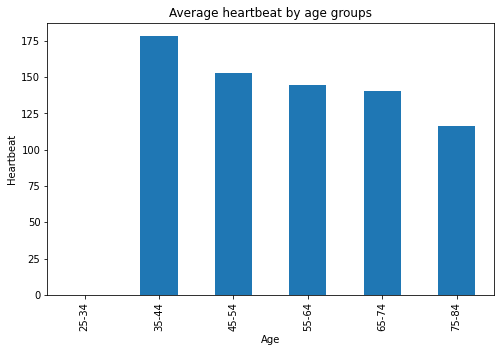

In [14]:
plot = plot_data.plot(kind='bar', xlabel='Age', ylabel='Heartbeat', title='Average heartbeat by age groups', figsize=(8, 5)).get_figure()

In [15]:
plot.savefig('heartbeat.jpeg', bbox_inches='tight')